In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import databuilder
import matplotlib.dates as mdates

# Load all data
db = databuilder.DataBuilder()


Loading ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2019.csv
Loading ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2020.csv
Loading ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2021.csv
Loading ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2022.csv
Loading ./Resources/COS2023.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331
Loading ./Resources/full_moons.csv
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868
Loading ./Resources/merc_retro.csv
Successfully loaded data for ./Resources/merc_retro.csv

Successfully combined 1 files
Total records: 16
Loading ./Resources/Newmoondata.csv
Successfully loaded data for ./Resources/Newmoondata.csv

Successfully combined 1 files
Total records: 62


In [31]:
# Load the ergency dataset and display the first few rows
emergency_df = db.get_emergency_data()
display(emergency_df.head())

# Load the full moon data and display the first few rows
full_moon_df = db.get_full_moon_data()
# Filter for dates between 2019 and 2023
full_moon_df = full_moon_df[
    (full_moon_df['DateTime'].dt.year >= 2019) & 
    (full_moon_df['DateTime'].dt.year <= 2023)
]
display(full_moon_df.head())

,INCIDENT,REPORTED,CLOSED,CATEGORY,Date
0,19000004,2019-01-01 00:03:00,2019-01-01 01:22:00,ALS,2019-01-01
1,19000006,2019-01-01 00:05:00,2019-01-01 00:29:00,ALS,2019-01-01
2,19000008,2019-01-01 00:07:00,2019-01-01 00:20:00,ALS,2019-01-01
3,19000011,2019-01-01 00:10:00,2019-01-01 00:23:00,BLS,2019-01-01
4,19000013,2019-01-01 00:10:00,2019-01-01 00:36:00,ALS,2019-01-01


,Day,Flag,DateTime
235,Thursday,Full,2019-01-16 09:44:00
236,Saturday,Full,2019-02-15 00:37:42
237,Sunday,Full,2019-03-16 16:40:42
238,Tuesday,Full,2019-04-15 09:24:48
239,Thursday,Prenumbral Eclipse,2019-05-15 02:00:54


In [32]:
# Assuming your dataframe is named emergency_df
emergency_df['Date'] = emergency_df['REPORTED'].dt.date
emergency_df_grouped = emergency_df.groupby('Date').size().reset_index(name='Count') #Group by date and display count of rows

# Convert REPORTED_DATE back to datetime for easier plotting
emergency_df_grouped['Date'] = pd.to_datetime(emergency_df_grouped['Date'])

print(len(emergency_df_grouped))
display(emergency_df_grouped.head())

1826


,Date,Count
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538


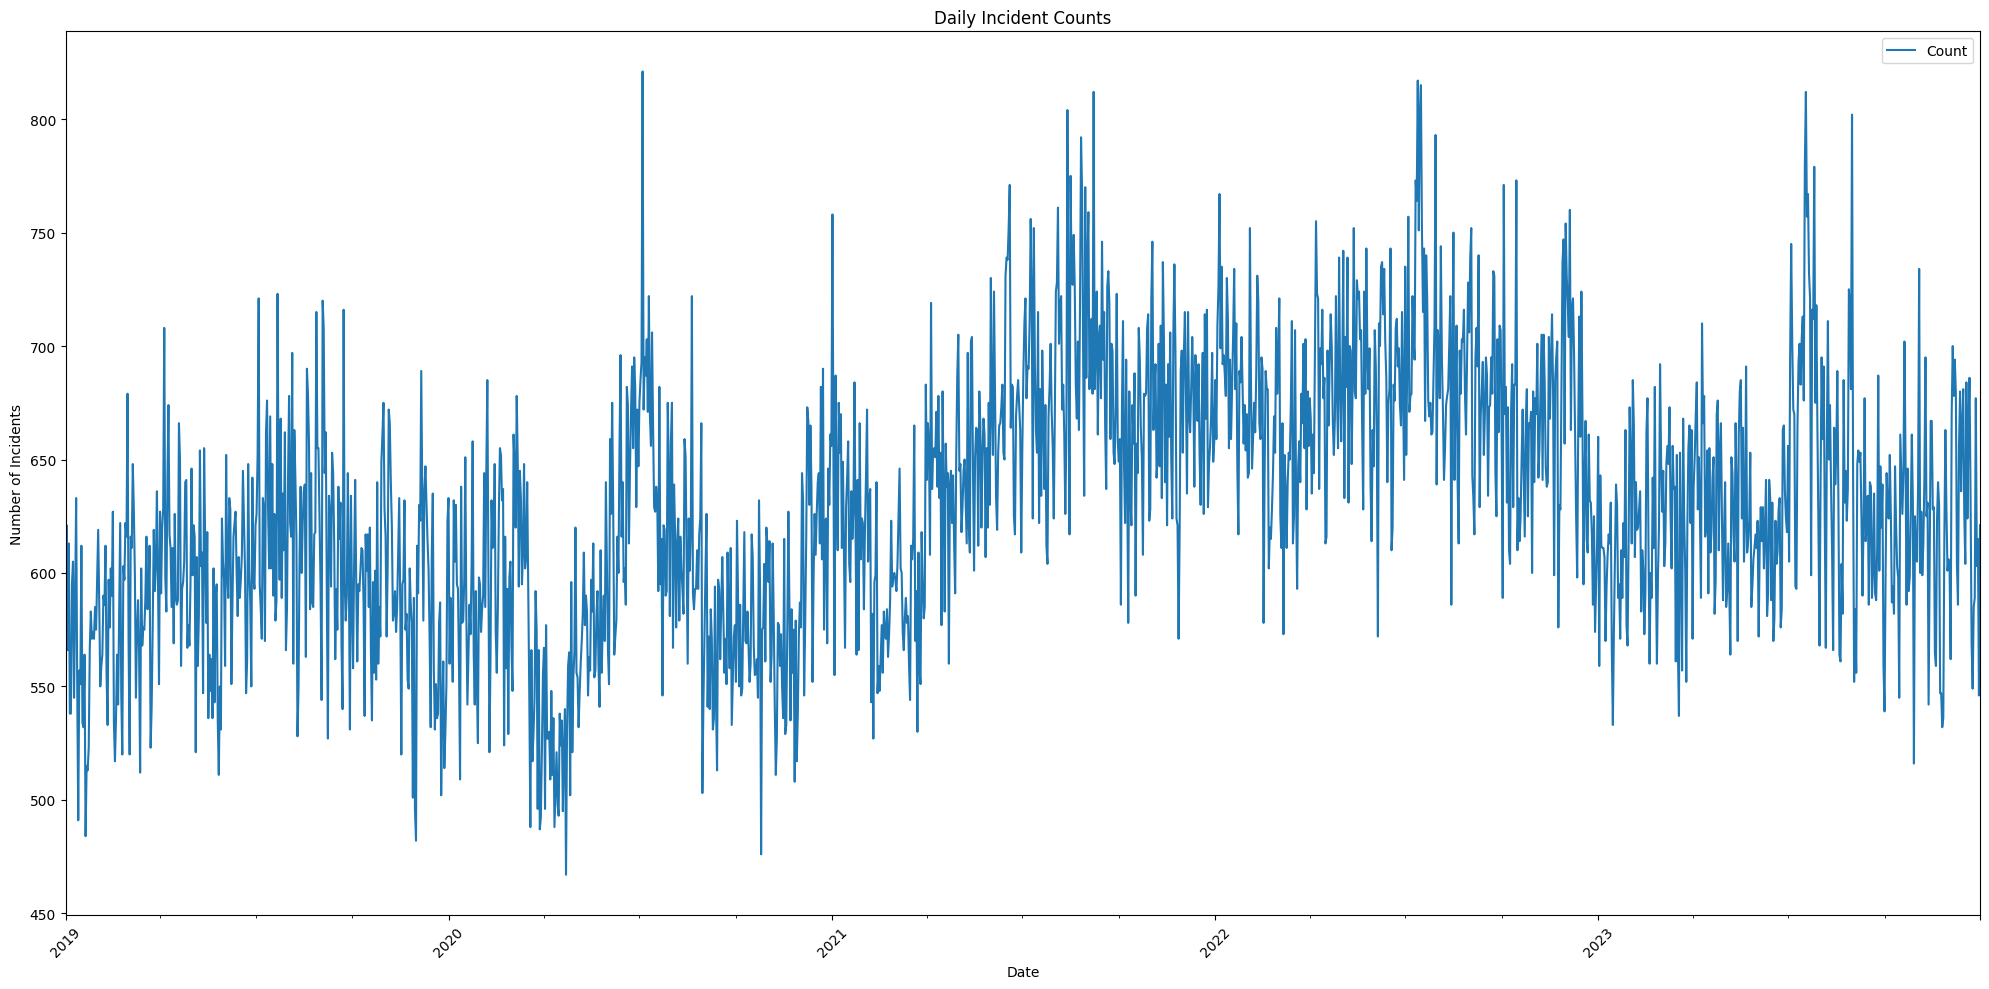

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
emergency_df_grouped.plot(x='Date', y='Count', ax=ax)
# Adjust the number of ticks on the x-axis to improve readability
#num_ticks = 20 
#step = len(Count) // num_ticks

# Customize the plot
plt.title('Daily Incident Counts')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [34]:
print(len(full_moon_df))
print(full_moon_df.columns)
print(full_moon_df.dtypes)
display(full_moon_df)

124
Index(['Day', 'Flag', 'DateTime'], dtype='object')
Day                 object
Flag                object
DateTime    datetime64[ns]
dtype: object


,Day,Flag,DateTime
235,Thursday,Full,2019-01-16 09:44:00
236,Saturday,Full,2019-02-15 00:37:42
237,Sunday,Full,2019-03-16 16:40:42
238,Tuesday,Full,2019-04-15 09:24:48
239,Thursday,Prenumbral Eclipse,2019-05-15 02:00:54
...,...,...,...
1529,Thursday,Blue,2023-08-31 03:35:42
1530,Friday,Full,2023-09-29 11:57:36
1531,Saturday,Partial Eclipse,2023-10-28 22:24:06
1532,Monday,Full,2023-11-27 10:16:24


In [35]:
# Only keep Flag values that are Full
full_moon_simplified_df = full_moon_df[full_moon_df['Flag'] == 'Full']

display(full_moon_simplified_df)

,Day,Flag,DateTime
235,Thursday,Full,2019-01-16 09:44:00
236,Saturday,Full,2019-02-15 00:37:42
237,Sunday,Full,2019-03-16 16:40:42
238,Tuesday,Full,2019-04-15 09:24:48
240,Friday,Full,2019-06-13 17:27:54
...,...,...,...
1527,Monday,Full,2023-07-03 13:38:42
1528,Tuesday,Full,2023-08-01 20:31:42
1530,Friday,Full,2023-09-29 11:57:36
1532,Monday,Full,2023-11-27 10:16:24


In [36]:
full_moon_simplified_date_df = full_moon_simplified_df.copy()
full_moon_simplified_date_df['Date'] = full_moon_simplified_df['DateTime'].dt.date
full_moon_simplified_date_df = full_moon_simplified_date_df.drop(columns=['DateTime'])

# Convert Date back to datetime for easier plotting
full_moon_simplified_date_df['Date'] = pd.to_datetime(full_moon_simplified_date_df['Date'])

display(full_moon_simplified_date_df)

,Day,Flag,Date
235,Thursday,Full,2019-01-16
236,Saturday,Full,2019-02-15
237,Sunday,Full,2019-03-16
238,Tuesday,Full,2019-04-15
240,Friday,Full,2019-06-13
...,...,...,...
1527,Monday,Full,2023-07-03
1528,Tuesday,Full,2023-08-01
1530,Friday,Full,2023-09-29
1532,Monday,Full,2023-11-27


In [37]:
# Display Count for Reported_Date that appears in both emergency_df_grouped and full_moon_simplified_df
# Step 1: Find the common Reported_Date values
common_dates = emergency_df_grouped[emergency_df_grouped['Date'].isin(full_moon_simplified_date_df['Date'])]

# Display the count of common Reported_Date values
display(common_dates)

,Date,Count
15,2019-01-16,612
45,2019-02-15,627
49,2019-02-19,564
74,2019-03-16,576
79,2019-03-21,589
...,...,...
1757,2023-10-24,592
1787,2023-11-23,547
1791,2023-11-27,615
1817,2023-12-23,569


In [38]:
#remove full moon days from emergency_df_grouped
emergency_df_grouped_no_full_moon = emergency_df_grouped[~emergency_df_grouped['Date'].isin(common_dates['Date'])]
print(f"Total records: {len(emergency_df_grouped)}")
print(f"Total records: {len(emergency_df_grouped_no_full_moon)}")
print(f"Total records: {len(common_dates)}")

Total records: 1826
Total records: 1728
Total records: 98


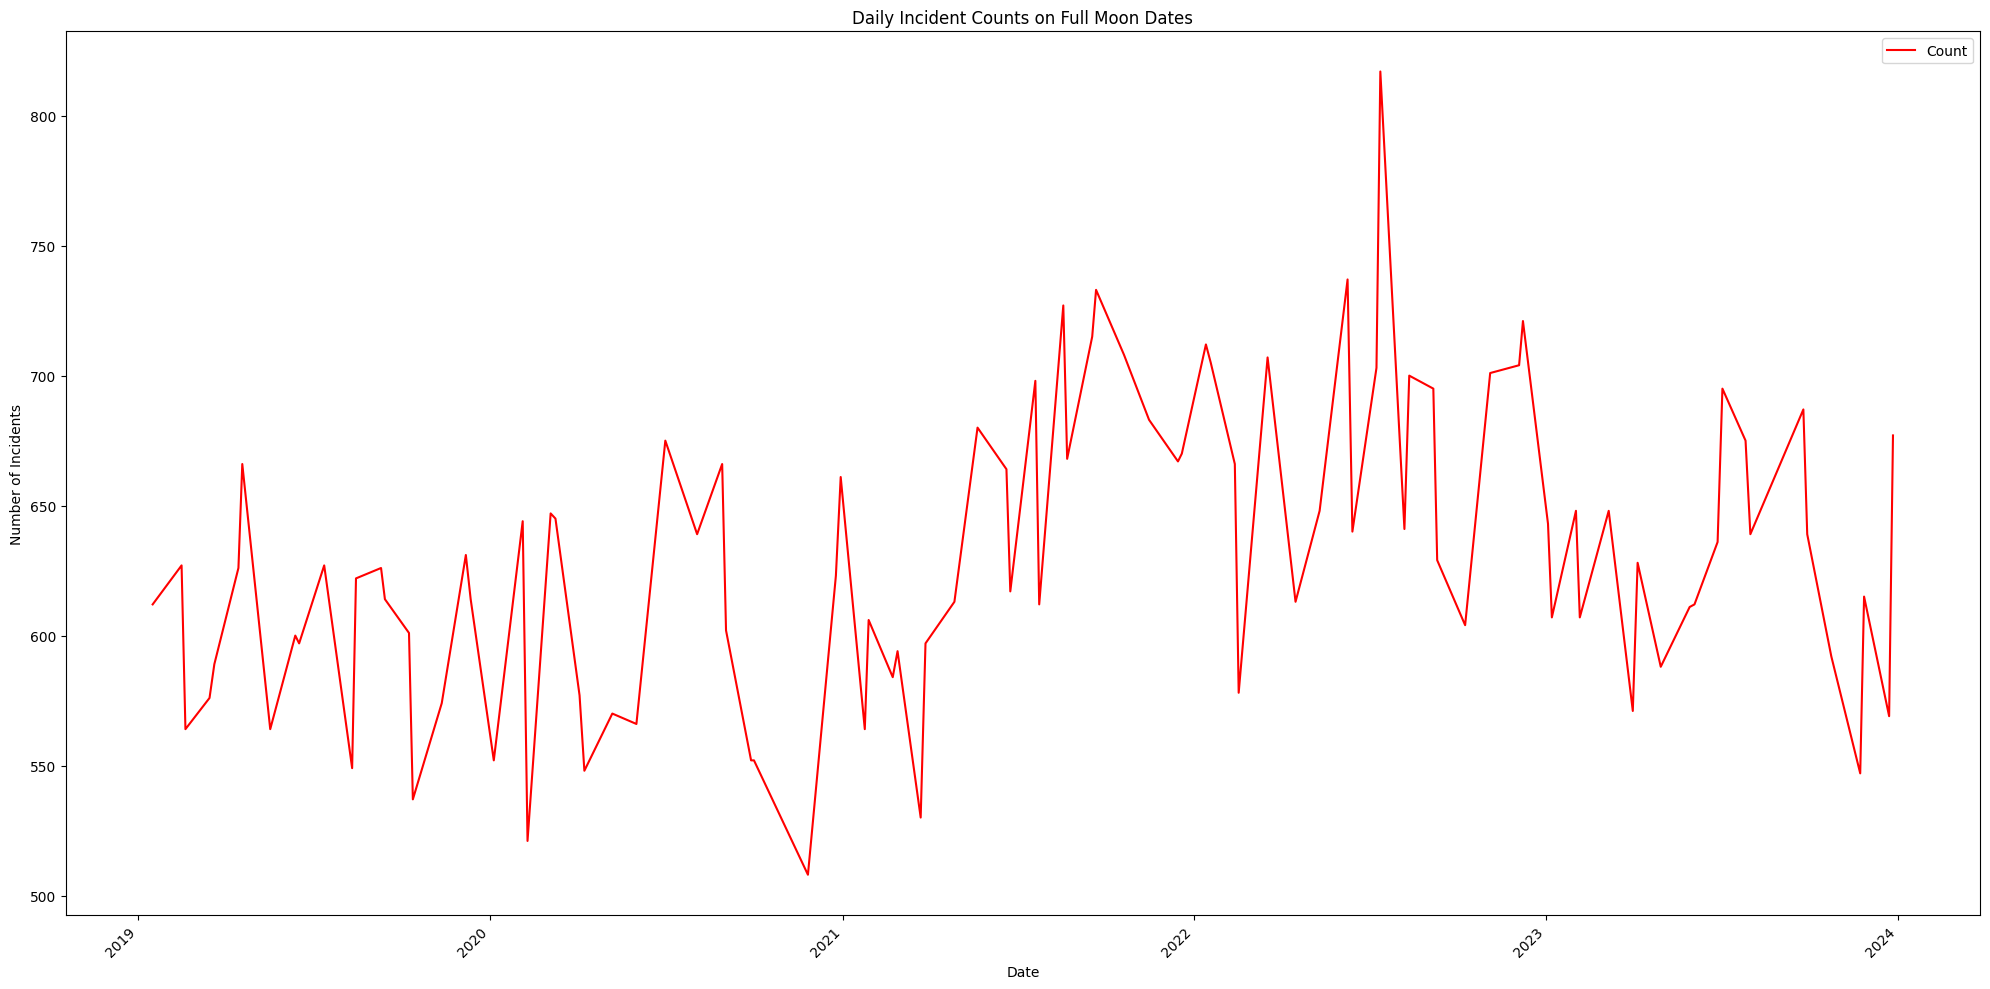

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
common_dates.plot(color='red', x='Date', y='Count', ax=ax)

# Customize the plot
plt.title('Daily Incident Counts on Full Moon Dates')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

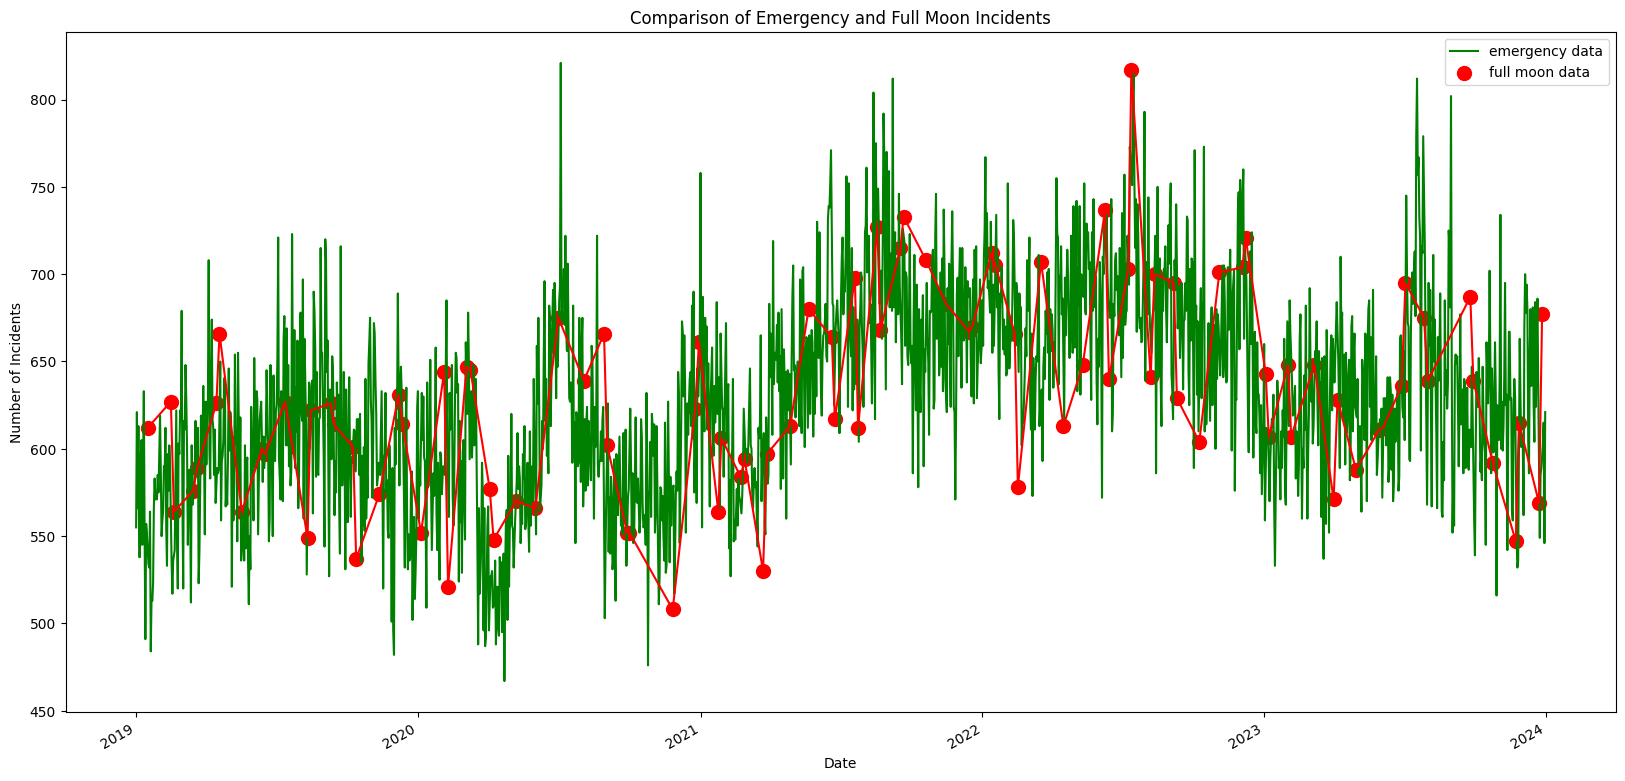

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))



emergency_df_grouped_no_full_moon.plot(color='green', x='Date', y='Count', ax=ax)
common_dates.plot(kind='scatter', s=100, color='red', x='Date', y='Count', ax=ax)
common_dates.plot(color='red', x='Date', y='Count', ax=ax)

plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Comparison of Emergency and Full Moon Incidents')
plt.legend(['emergency data', 'full moon data'])
plt.show()

#### This graph doesn't show any visible relationship between full moon day incidents vs non-full moon incidents.  There one spike, in 2022 where the full moon day had more incidents.

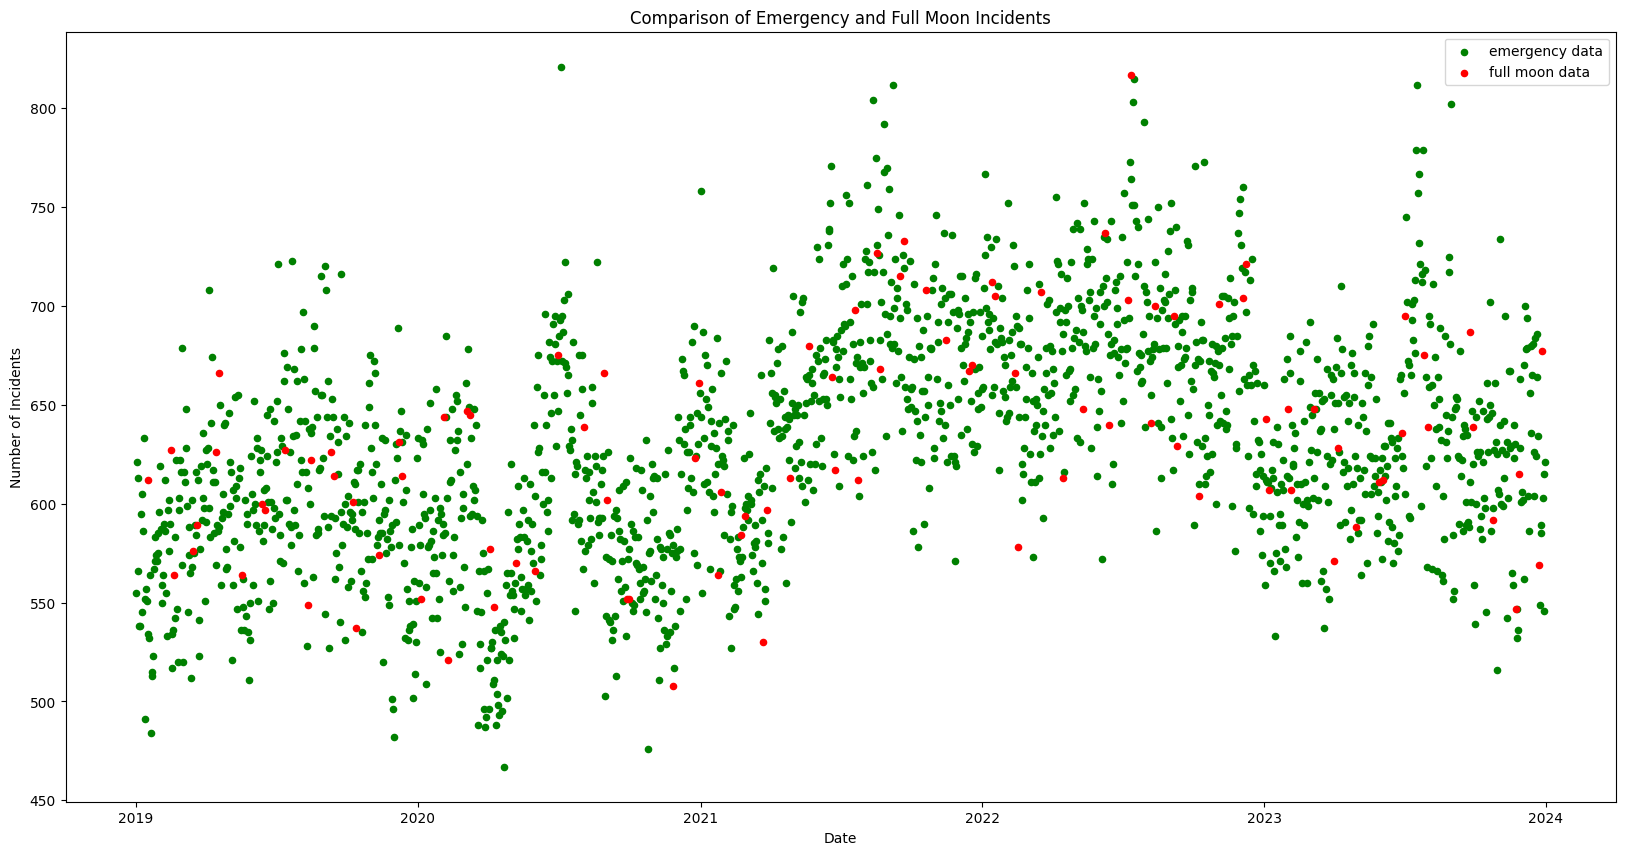

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))

emergency_df_grouped_no_full_moon.plot(kind='scatter', color='green', x='Date', y='Count', ax=ax)
common_dates.plot(kind='scatter', color='red', x='Date', y='Count', ax=ax)

plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Comparison of Emergency and Full Moon Incidents')
plt.legend(['emergency data', 'full moon data'])
plt.show()

#### Just like the previous graph, this graph doesn't show any visible relationship between full moon day incidents vs non-full moon incidents.  The one spike, in 2022, is more visible in this one as an outlier.

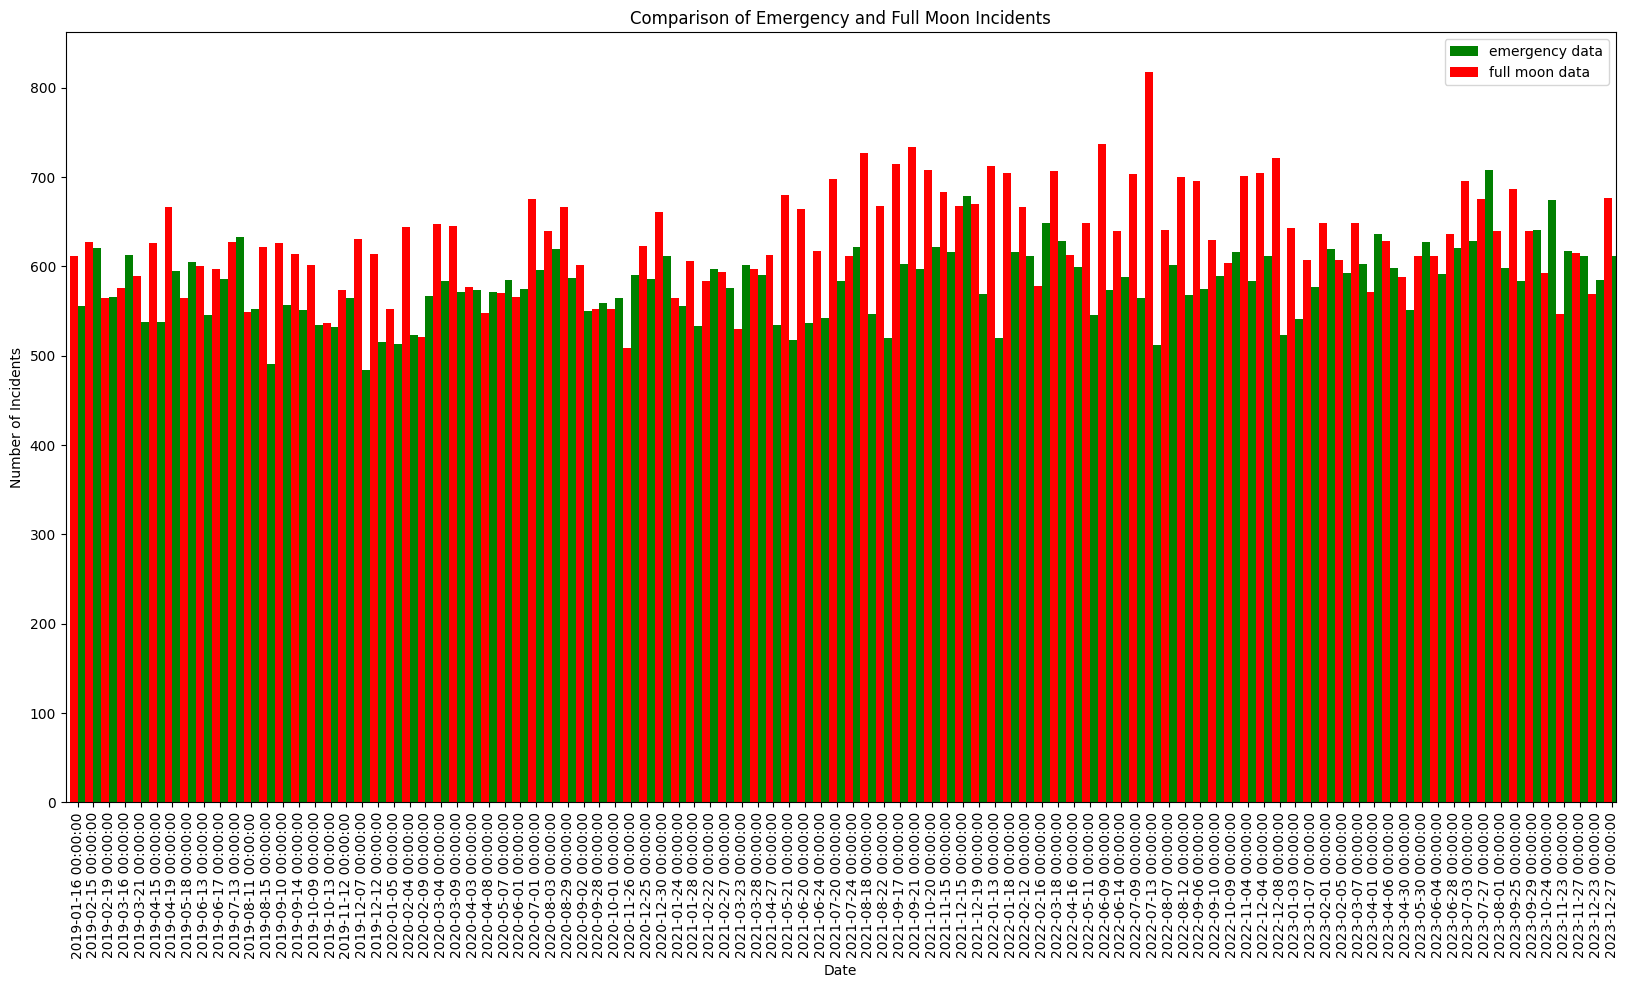

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))

emergency_df_grouped_no_full_moon.plot(kind='bar', color='green', x='Date', y='Count', position=0, ax=ax)
common_dates.plot(kind='bar', color='red', x='Date', y='Count', position=1, ax=ax)

plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Comparison of Emergency and Full Moon Incidents')
plt.legend(['emergency data', 'full moon data'])
plt.show()

#### In this bar graph, there isn't really any difference between the full moon days and non-full moon days.

In [43]:
#Display the average number of incidents on full moon days and non-full moon days
#in the year 2020. The data is available in the file full_moon.csv.

full_moon_avg = common_dates['Count'].mean()
emergency_df_grouped_avg = emergency_df_grouped['Count'].mean()
emergency_df_grouped_no_full_moon_avg = emergency_df_grouped_no_full_moon['Count'].mean()

print(f'Average number of incidents on full moon days: {full_moon_avg:.2f}')
print(f'Average number of incidents: {emergency_df_grouped_avg:.2f}')
print(f'Average number of incidents on non-full moon days: {emergency_df_grouped_no_full_moon_avg:.2f}')

Average number of incidents on full moon days: 630.09
Average number of incidents: 629.97
Average number of incidents on non-full moon days: 629.97


In [44]:
percent_diff = ((full_moon_avg - emergency_df_grouped_no_full_moon_avg) / emergency_df_grouped_no_full_moon_avg) * 100

print(f"\nPercent difference: {percent_diff:.2f}%")


Percent difference: 0.02%


#### When comparing the averages a full moon does not seem to have an effect on incident numbers. A 0.02% difference is not that much.

In [45]:
# Load and process the full moon data
full_moon_dates = set(pd.to_datetime(full_moon_simplified_df['DateTime']).dt.date)

# Process the emergency incidents data
emergency_df['REPORTED'] = pd.to_datetime(emergency_df['REPORTED'])
daily_incidents = emergency_df.groupby(emergency_df['REPORTED'].dt.date).size().reset_index(name='incident_count')
daily_incidents['full_moon'] = daily_incidents['REPORTED'].isin(full_moon_dates).astype(int)

# Calculate the correlation using .corr()
correlation = daily_incidents[['incident_count', 'full_moon']].corr().iloc[0, 1]

print(f"Correlation between incident count and full moon: {correlation:.4f}")

Correlation between incident count and full moon: 0.0005


#### A score of 0.0005 shows that there is pretty much no correlation between incident counts and full moon activity.

#### In conclusion:  A full moon does not affect the quantity of calls.  All calls were within in the average range of calls for non-full moon days, with the exception of a couple outlier days.